In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

Possible Findings :
1) How many restaurants accpeting online order for zomato?
2) Find best location by seeing dataset.
3) Find Types of restraunts and their count.
4) Find count of restaurants have table boking facility.
5) Find number of restaurant at given location.
6) Find most famous restaurants chains(like Franchise(Rastaurants having more than one branch) in Bangalore.
7) Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.
8) Gaussian Rest Type(Normal Distribution) of Rating.
9) Find the how many Restaurants havign Chinese and North Indian food in their food type.
10) Find the most profitable type of restaurant.

In [4]:
data= pd.read_csv(r'C:\Users\asus\Desktop\Mine\Projects\zomato.csv')  
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
Data  Cleaning

In [8]:
print(data.duplicated().value_counts())
print('\nTherefore there are no duplicate rows in the dataset') 

False    51717
Name: count, dtype: int64

Therefore there are no duplicate rows in the dataset


In [10]:
zmt_data= data.drop(['url','reviews_list','menu_item','address','phone','dish_liked'], axis=1) 
zmt_data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [12]:
zmt_data.rename(columns= {'name':'restaurants','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'}, inplace=True) 
zmt_data.head(3)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


Droping Unnecessary Columns:

Unnecessary columns are those columns which are not that useful for analysis.

In [14]:
zmt_data.dropna(inplace=True) 
zmt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43533 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   43533 non-null  object
 1   online_order  43533 non-null  object
 2   book_table    43533 non-null  object
 3   rating        43533 non-null  object
 4   votes         43533 non-null  int64 
 5   location      43533 non-null  object
 6   rest_type     43533 non-null  object
 7   food_type     43533 non-null  object
 8   cost          43533 non-null  object
 9   type          43533 non-null  object
 10  city          43533 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [16]:
zmt_data['restaurants'].unique() 
zmt_data.groupby('restaurants').count().head() 
zmt_data['restaurants']= zmt_data['restaurants'].replace('ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°','', regex=True)  
zmt_data['restaurants']= zmt_data['restaurants'].replace('Caf-|Caf ','Cafe ',regex=True)
zmt_data.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3


In [18]:
zmt_data.columns= zmt_data.columns.str.lower()    
zmt_data.columns

Index(['restaurants', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'food_type', 'cost', 'type', 'city'],
      dtype='object')

In [20]:
zmt_data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
zmt_data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
zmt_data['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [26]:
zmt_data['rating']= zmt_data['rating'].str.replace('/5', '')  
zmt_data['rating']= zmt_data['rating'].replace({'NEW': 3.51, '-':3.51})
#zmt_data['rating'] 
zmt_data['rating']= zmt_data['rating'].astype(float)
sum= zmt_data['rating'].agg({'rating':'sum'})  
avg= sum/43533
print(avg) 
zmt_data['rating']= zmt_data['rating'].replace({'NEW': 3.51, '-':3.51})
print(zmt_data['rating'].unique()) 
zmt_data['rating'].dtype

rating    3.691999
Name: rating, dtype: float64
[4.1  3.8  3.7  3.6  4.6  4.   4.2  3.9  3.1  3.   3.2  3.3  2.8  4.4
 4.3  3.51 2.9  3.5  2.6  3.4  4.5  2.5  2.7  4.7  2.4  2.2  2.3  4.8
 4.9  2.1  2.   1.8 ]


dtype('float64')

In [28]:
avg= np.mean((zmt_data['rating'])) 
avg

3.691999173041141

In [32]:
zmt_data['votes'].isnull().value_counts() 

votes
False    43533
Name: count, dtype: int64

You can see that the data follows a normal distribution


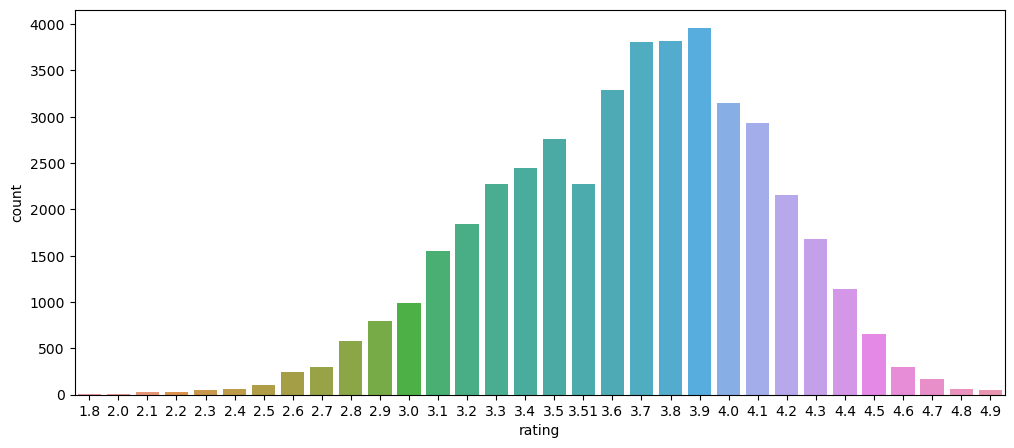

In [30]:
#plt.subplots(figsize=(12,5)) 
fig= plt.gcf() 
fig.set_size_inches(12,5)
sns.countplot(x='rating', data= zmt_data) 
print('You can see that the data follows a normal distribution')

In [34]:
zmt_data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [36]:
print(zmt_data['food_type'].unique()) 
print(zmt_data['food_type'].value_counts())
print('\n',zmt_data['food_type'].isnull().value_counts())

['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' ... 'Tibetan, Nepalese'
 'North Indian, Street Food, Biryani'
 'North Indian, Chinese, Arabian, Momos']
food_type
North Indian                                                           2244
North Indian, Chinese                                                  2033
South Indian                                                           1318
Bakery, Desserts                                                        642
Biryani                                                                 632
                                                                       ... 
Chinese, Bakery                                                           1
South Indian, Fast Food, Chinese                                          1
Asian, Continental, Healthy Food                                          1
South Indian, North Indian, Chinese, Desserts, Fast Food, Ice Cream       1
North Indian, Chinese, Arabian, Momo

In [38]:
cost_data= zmt_data.groupby('cost').agg({'cost': 'count'}) 
cost_data= pd.DataFrame(cost_data) 
cd= cost_data.drop(['cost'], axis=1)
cd.sort_values('cost', ascending=True)

""
cost
"1,000"
"1,050"
"1,100"
"1,200"
"1,250"
...
80
800
850


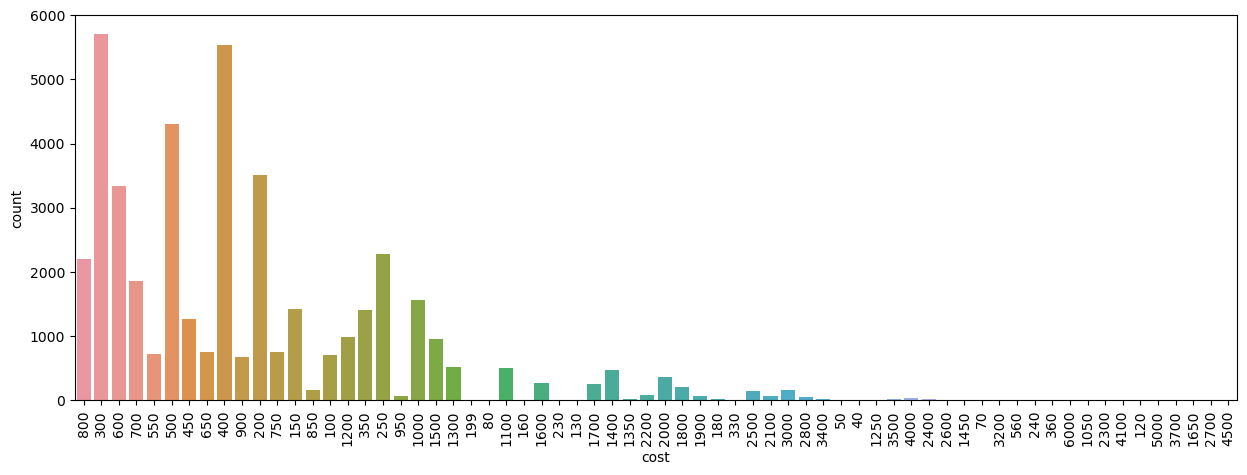

In [46]:
#zmt_data['cost'].unique()
zmt_data['cost']= zmt_data['cost'].str.replace(',' , '')   
zmt_data['cost'].astype(float)
zmt_data['cost'].unique() 

fig, ax= plt.subplots(figsize=(15,5)) 
for ticks in ax.get_xticklabels():
     ticks.set_rotation(90) 

sns.countplot(x='cost', data= zmt_data) 
plt.show()

In [48]:
cost_data.rename(columns={'cost': 'count'}, inplace= True)
cost_data.reset_index()

,cost,count
0,"1,000",1562
1,"1,050",4
2,"1,100",510
3,"1,200",979
4,"1,250",9
...,...,...
61,80,4
62,800,2202
63,850,162
64,900,677


In [50]:
count= zmt_data['cost'].sort_values(ascending=True)  
count= pd.DataFrame(count)
count= count.dropna()
count

,cost
25745,100
23343,100
23345,100
23389,100
23534,100
...,...
17711,950
44856,950
2280,950
3446,950


In [52]:
zmt_data['cost']= zmt_data['cost'].str.replace(',' ,'')  
zmt_data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [54]:
zmt_data.drop_duplicates(keep='last', inplace= True) 
zmt_data.duplicated().value_counts()

False    43447
Name: count, dtype: int64

Data Visualization

In [56]:
zmt_data

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


<Axes: xlabel='online_order', ylabel='count'>

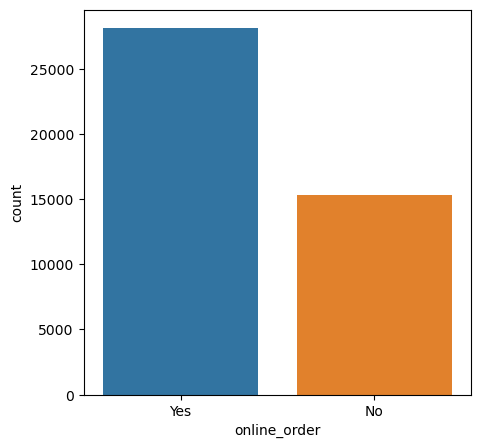

In [58]:
fig, ax= plt.subplots(figsize=(5,5))
sns.countplot(x='online_order', data= zmt_data)

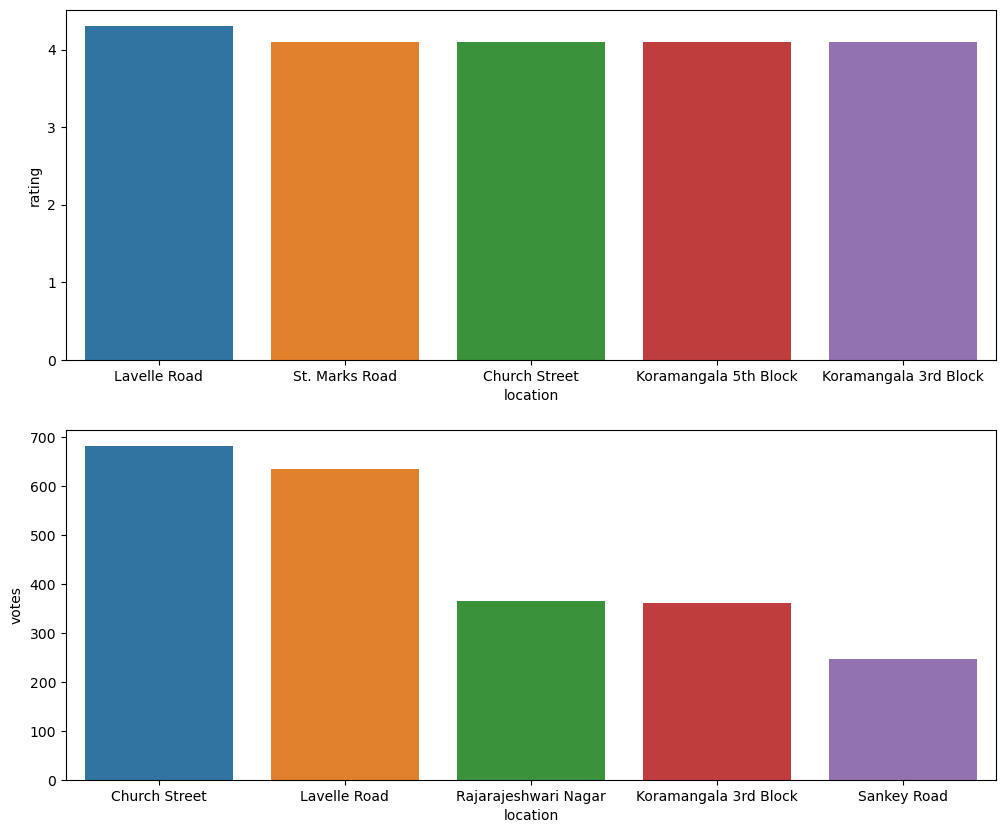

In [60]:
fig= plt.figure(figsize=(12,10)) 
plt.subplot(2,1,1) 
rating_loc= zmt_data.groupby('location').agg({'rating': 'median'}).sort_values('rating', ascending=False).head(5)
rating_loc.reset_index(inplace=True)  
sns.barplot(x='location', y='rating', data= rating_loc) 
plt.subplot(2,1,2)
rating_loc= zmt_data.groupby('location').agg({'votes': 'median'}).sort_values('votes', ascending=False).head(5)
rating_loc.reset_index(inplace=True)  
sns.barplot(x='location', y='votes', data= rating_loc)  
plt.show()

<Axes: xlabel='restaurants', ylabel='rest_type'>

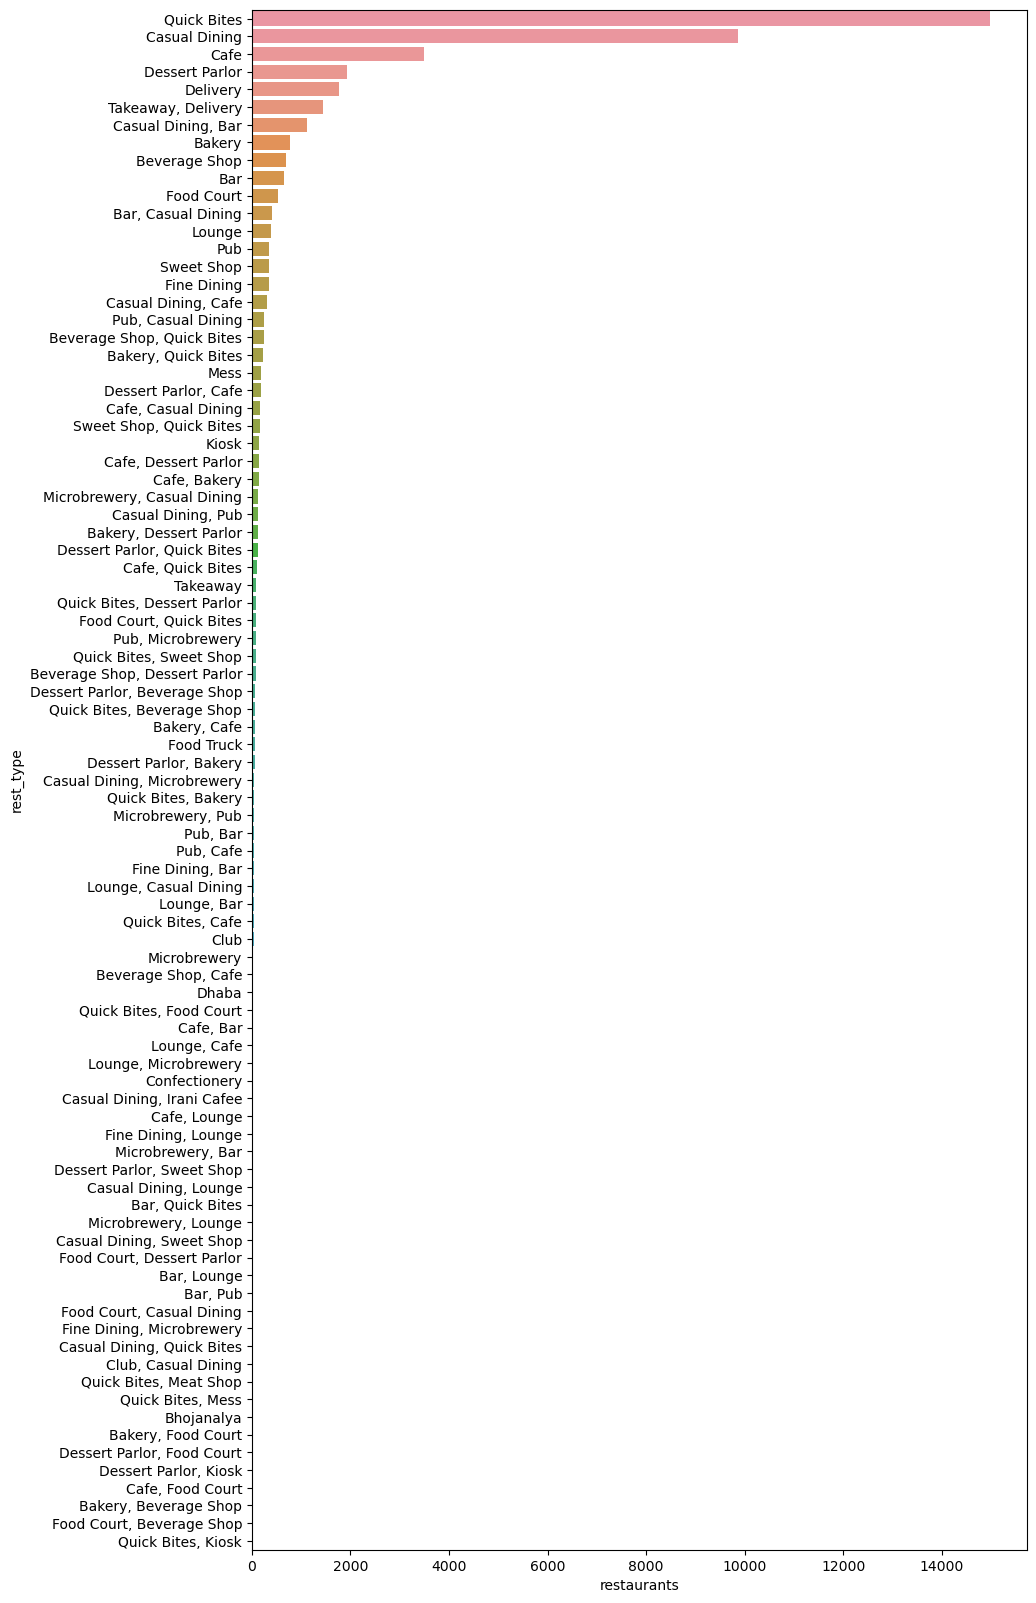

In [62]:
fig= plt.figure(figsize=(10,20))
rest_type_vs_rest= zmt_data.groupby('rest_type').agg({'restaurants':'count'}).sort_values('restaurants', ascending=False)   
sns.barplot(x='restaurants', y= rest_type_vs_rest.index, data=rest_type_vs_rest)

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


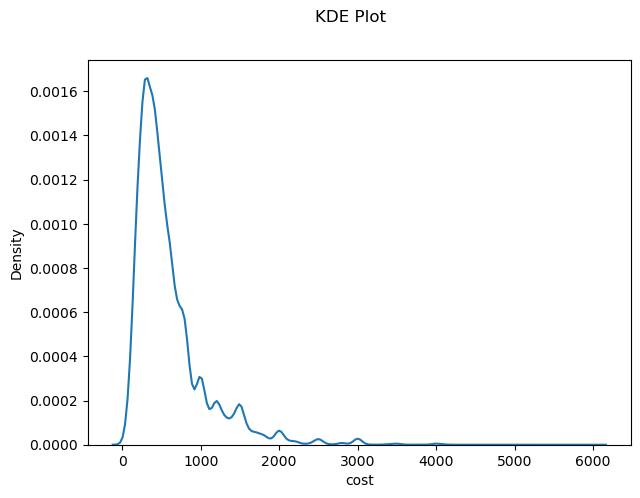

In [64]:
fig= plt.gcf() 
fig.set_size_inches(7,5)    
fig.suptitle('KDE Plot')
zmt_data['cost']= zmt_data['cost'].astype(float)
sns.kdeplot(x='cost', data= zmt_data) 
plt.show()

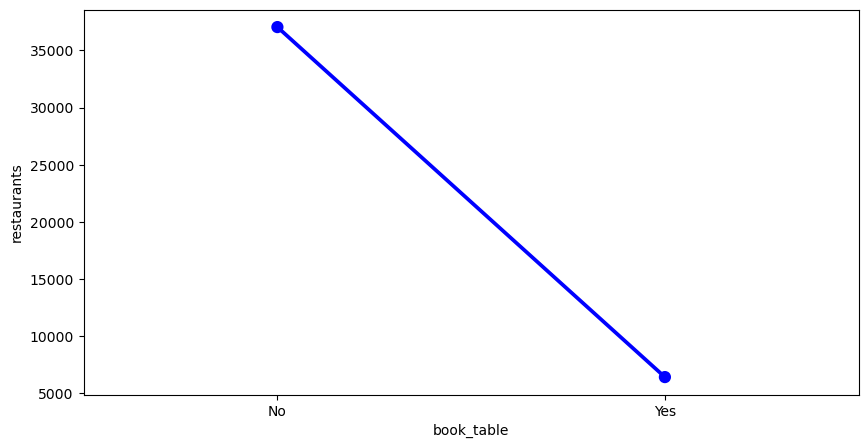

In [90]:
plt.figure(figsize=(10,5))
table_booking= zmt_data.groupby('book_table')['restaurants'].count().reset_index()
sns.pointplot(x='book_table',y='restaurants',color='b',data=table_booking)
plt.show()

<Axes: xlabel='location', ylabel='restaurants'>

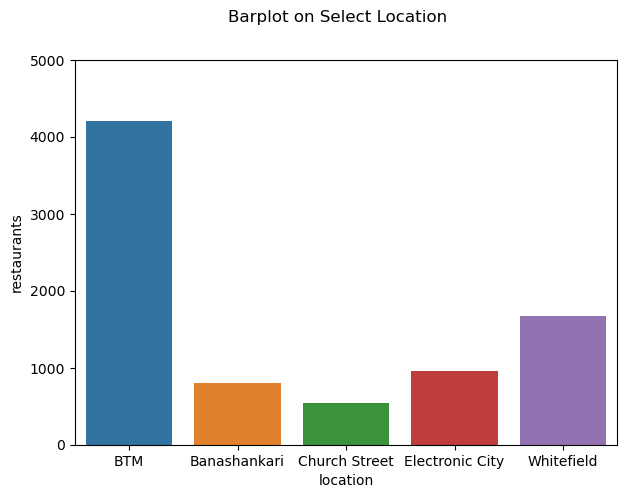

In [66]:
dat= pd.DataFrame(zmt_data.groupby('location')['restaurants'].count().reset_index()) 
criteria= dat['location'].isin(['Banashankari','Whitefield','Church Street','Electronic City','BTM'])    
fig= plt.figure(figsize=(7,5)) 
plt.ylim(0,5000)
fig.suptitle('Barplot on Select Location')
sns.barplot(x='location', y='restaurants', data=dat[criteria])

In [68]:
df=pd.DataFrame(zmt_data.groupby(['location','restaurants','rating']).count().reset_index())    
df

,location,restaurants,rating,online_order,book_table,votes,rest_type,food_type,cost,type,city
0,BTM,100C,3.7,3,3,3,3,3,3,3,3
1,BTM,2nd Home Restaurant,3.7,11,11,11,11,11,11,11,11
2,BTM,36th Cross Coffee Mane,3.7,1,1,1,1,1,1,1,1
3,BTM,"3B's - Buddies, Bar & Barbecues",4.4,13,13,13,13,13,13,13,13
4,BTM,A2B - Adyar Ananda Bhavan,3.8,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11683,Yeshwantpur,The Cupcake Story,3.5,1,1,1,1,1,1,1,1
11684,Yeshwantpur,The Duke Of Juices,3.3,1,1,1,1,1,1,1,1
11685,Yeshwantpur,Tuckinto,3.8,2,2,2,2,2,2,2,2
11686,Yeshwantpur,Udupi Garden,3.0,2,2,2,2,2,2,2,2


C:\Users\asus\AppData\Local\Temp\ipykernel_21520\1352492925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cost', ylabel='Density'>

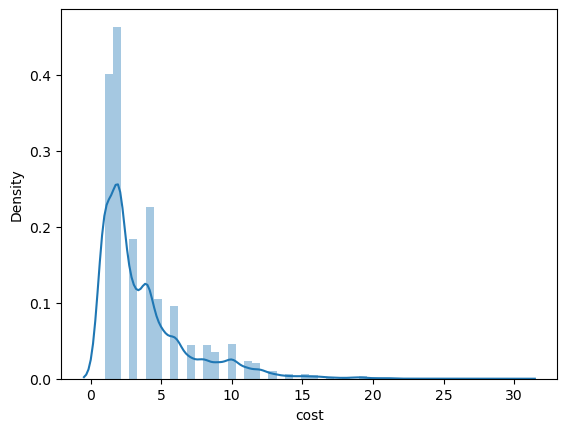

In [70]:
sns.distplot(df['cost'])

In [72]:
chains_restaurants=df[(df['book_table']>1)]
famous_restaurants=pd.DataFrame(chains_restaurants.groupby('location')[['restaurants','rating']].max().reset_index())
famous_restaurants

,location,restaurants,rating
0,BTM,eat.fit,4.90
1,Banashankari,Yo Roll Corner,4.60
2,Banaswadi,Zam Zam Restaurant,4.00
3,Bannerghatta Road,Zhangs Classic,4.60
4,Basavanagudi,Zephyr,4.60
...,...,...,...
84,West Bangalore,Garden City Mobile Biryani,3.51
85,Whitefield,nu.tree,4.90
86,Wilson Garden,Vijaya Sagar,4.00
87,Yelahanka,Prashanth Naati Corner,3.90


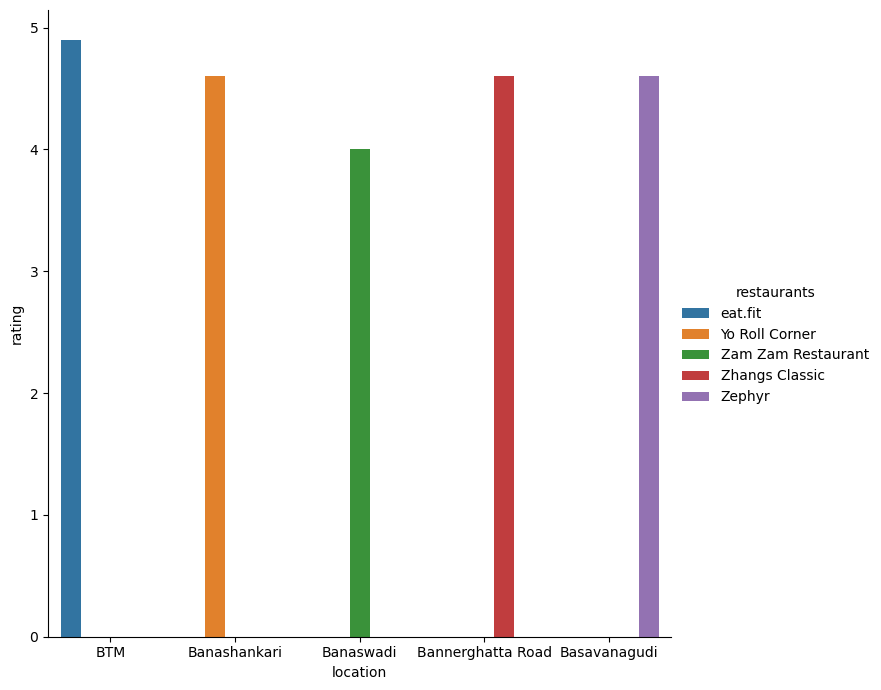

In [74]:
sns.catplot(x='location', y='rating', data=famous_restaurants.head(5), hue='restaurants', kind='bar', height= 7)

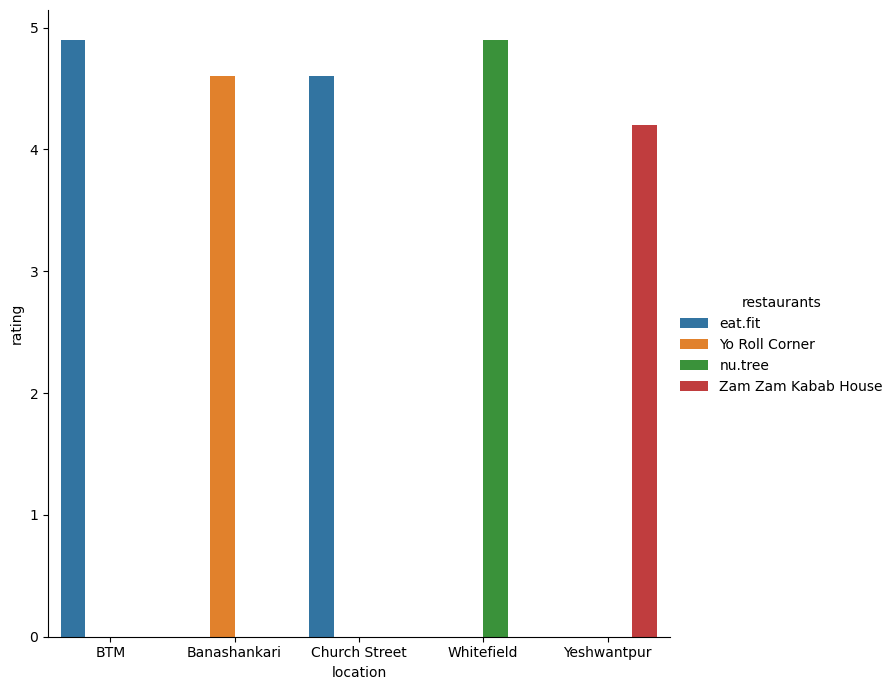

In [76]:
criteria= famous_restaurants['location'].isin(['Whitefield','Banashankari','Church Street', 'Yeshwantpur', 'BTM'])
sns.catplot(x='location', y='rating', data=famous_restaurants[criteria], hue='restaurants', kind='bar', height= 7)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

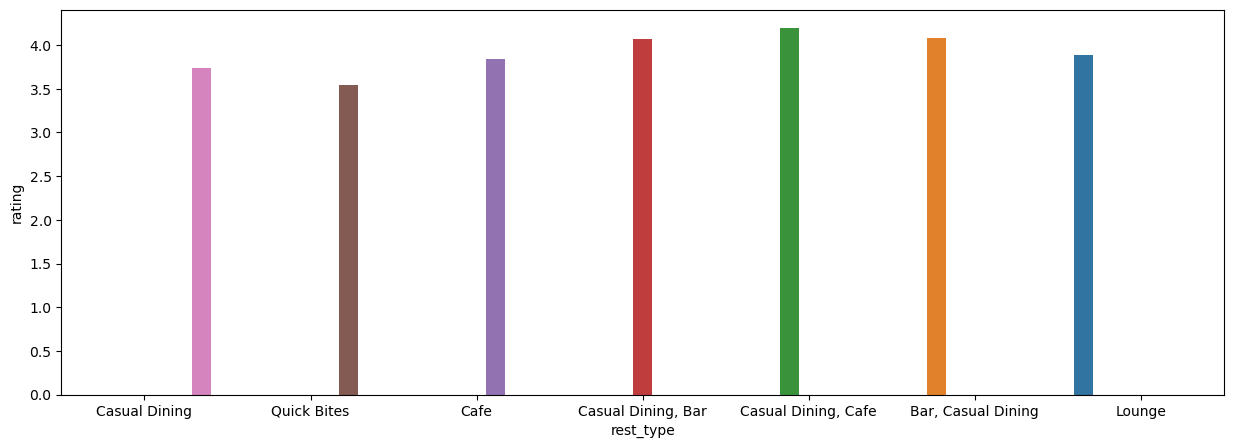

In [78]:
votes_data= zmt_data.groupby('rest_type').agg({'votes':'sum', 'rating':'mean'}).reset_index()
votes_data= votes_data.sort_values('votes', ascending= False) 
fig= plt.figure(figsize=(15,5))
sns.barplot(x='rest_type', y='rating', data= votes_data.head(7), hue='votes')

C:\Users\asus\AppData\Local\Temp\ipykernel_21520\4204696627.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zmt_data['rating'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Density'>

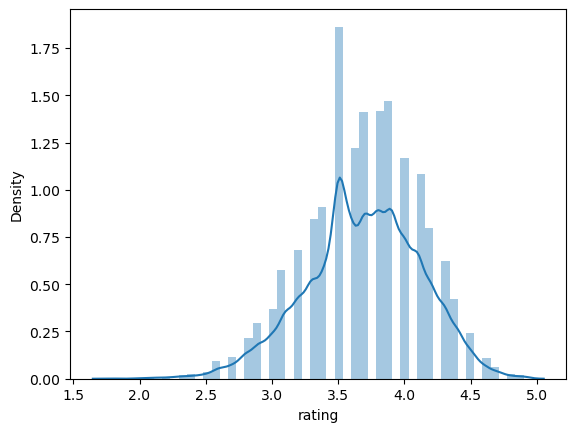

In [80]:
sns.distplot(zmt_data['rating'])

In [82]:
ni_count= len([i for i in zmt_data['food_type'] if 'North India' in i]) 
print(ni_count) 
cnt=0
for i in zmt_data['food_type']: 
    if 'Chinese' in i: 
        cnt+=1   
food_type= ['North Indian','Chinese'] 
Count= [ni_count,cnt]
food_type_data= pd.DataFrame({'Food_Type': food_type, 'Count': Count}) 
food_type_data

18185


,Food_Type,Count
0,North Indian,18185
1,Chinese,13516


<Axes: xlabel='Food_Type', ylabel='Count'>

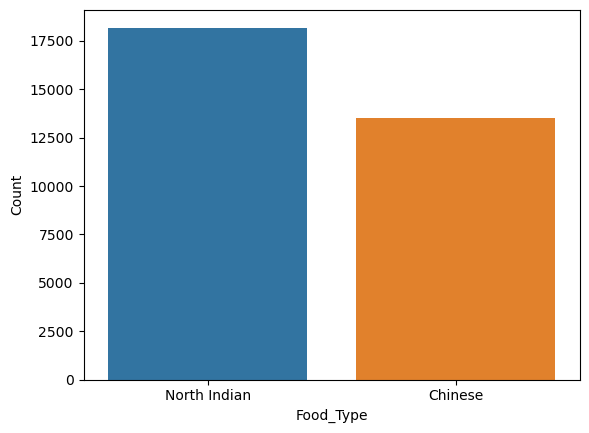

In [84]:
sns.barplot(x='Food_Type',y='Count', data=food_type_data)

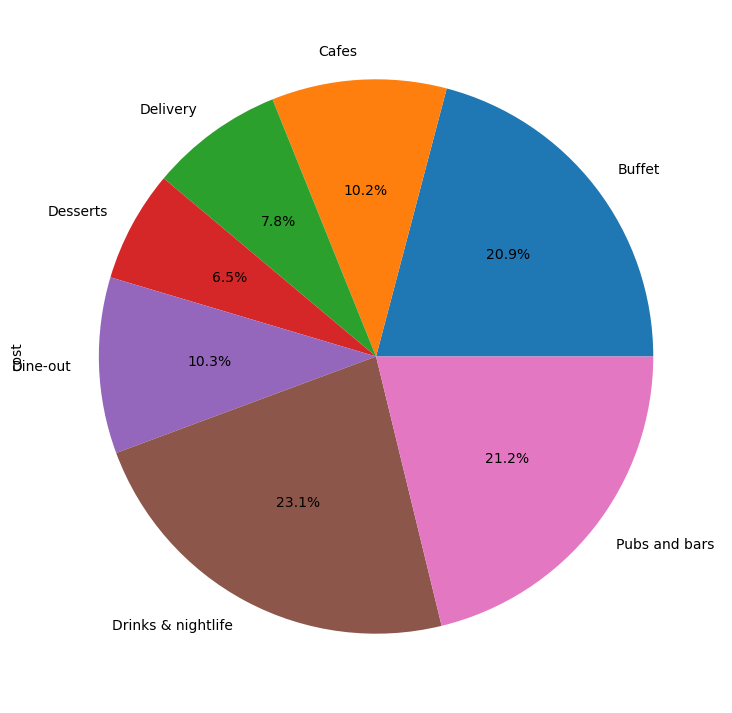

In [86]:
#most proftable genre of restaurant
zmt_data['cost']= zmt_data['cost'].astype(float)
df4=zmt_data.groupby('type').agg({'cost':'mean'})
df4.cost.plot(kind='pie',autopct='%1.1f%%',figsize=(9,9))
plt.show()